### FINAL PROJECT <br>
Muhammad Qureshi                B00980214
<br>S V Arun Varma Vanaparthi   B00977899
<br>Nitish Devineni                          B00974880
<br>Loksharan Saravanan              B00979751


In [2]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import shutil
import random

In [3]:
# 1) Checking the files are image files in each leaf directrory
# 2) if They are image files copying desired number of files (4000 in our case) in destination directory

# Defining the source and the target directories
source_dir = "Data"
target_dir = "Data4000"

# Set the maximum number of image files to copy
max_files_per_subdir = 4000

# Removing the previous target directory and its contents if they are already exist
if os.path.exists(target_dir):
    shutil.rmtree(target_dir)

# Create the target directory
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# checking if a file has an image extension and is not .ipynb_checkpoints
def is_image_file(file_name):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif']
    file_extension = os.path.splitext(file_name)[1].lower()
    return file_extension in image_extensions and '.ipynb_checkpoints' not in file_name

# looping thru, Shuffling and copying image files
for root, _, files in os.walk(source_dir):
    rel_path = os.path.relpath(root, source_dir)
    target_path = os.path.join(target_dir, rel_path)
    os.makedirs(target_path, exist_ok=True)

    image_files = [file for file in files if is_image_file(file)]

    # Shuffling the list of image files
    random.shuffle(image_files)

    # Copying a maximum of max_files_per_subdir files to the target directory
    for file in image_files[:max_files_per_subdir]:
        src_file = os.path.join(root, file)
        dest_file = os.path.join(target_path, file)

        shutil.copy2(src_file, dest_file)

print('Leaf Directories copied to a new Directory TPD4000')


Leaf Directories copied to a new Directory TPD4000


In [25]:
# This code copies all of the root directories(which are actaul categories) to a directory named "Data" 
# Copying root directories to a directory
import os
import shutil

# Define the source directory
source_directory = "Data4000"
destination_directory = "Data4000Cat"

# Remove destination directory if it already exists
if os.path.exists(destination_directory):
    shutil.rmtree(destination_directory)

# Create a new destination directory
os.makedirs(destination_directory)

def find_root_directory_names(source):
    parent_child_map = {}

    for root, dirs, files in os.walk(source):
        for item in dirs:
            item_path = os.path.join(root, item)

            # Check if the item is a directory
            if os.path.isdir(item_path):
                parent = os.path.dirname(item_path)

                # If the parent is not within the source directory, it's a root directory
                if parent != source:
                    parent_child_map[item_path] = parent

    # Filter out directories that are children of other directories
    root_directory_names = [directory for directory in parent_child_map.keys() if directory not in parent_child_map.values() and '.ipynb_checkpoints' not in directory]

    return root_directory_names

# Find the names of the root directories
root_directory_names = find_root_directory_names(source_directory)

# Copy root directories and their contents to the destination directory
for root_dir in root_directory_names:
    destination_dir = os.path.join(destination_directory, os.path.basename(root_dir))

    # Check if the destination directory already exists
    if not os.path.exists(destination_dir):
        shutil.copytree(root_dir, destination_dir)
    else:
        # If the destination directory already exists, copy the content using shutil.copy2
        for root, _, files in os.walk(root_dir):
            for file in files:
                src_file = os.path.join(root, file)
                dest_file = os.path.join(destination_dir, file)
                shutil.copy2(src_file, dest_file)

print('Number of Images in each Category before image generation:\n')
destination = "Data4000CAT"
total_images_count = 0

for subdir in os.listdir(destination):
    subdir_path = os.path.join(destination, subdir)
    if os.path.isdir(subdir_path):
        images_count = len([f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))])
        print(f"{subdir},----- Images Count: {images_count}")
        total_images_count += images_count

print(f"\nTotal Images: {total_images_count}")

Number of Images in each Category before image generation:

actinic keratosis,----- Images Count: 130
Adenocarcinoma,----- Images Count: 333
basal cell carcinoma,----- Images Count: 392
Cataract,----- Images Count: 1038
colon_aca,----- Images Count: 4000
colon_n,----- Images Count: 4000
Covid CT Disease,----- Images Count: 4000
Covid CT Healthy,----- Images Count: 2570
Covid XRAY Disease,----- Images Count: 2830
Covid XRAY Healthy,----- Images Count: 4000
dermatofibroma,----- Images Count: 111
Diabetic Retinopathy,----- Images Count: 1098
Dyskeratotic,----- Images Count: 4000
Glaucoma,----- Images Count: 1007
glioma_tumor,----- Images Count: 901
Kidney Tumor,----- Images Count: 4000
Koilocytotic,----- Images Count: 4000
Large cell carcinoma,----- Images Count: 177
lung_aca,----- Images Count: 4000
lung_n,----- Images Count: 772
Malaria,----- Images Count: 100
melanoma,----- Images Count: 454
meningioma_tumor,----- Images Count: 913
Metaplastic,----- Images Count: 4000
MildDemented,----

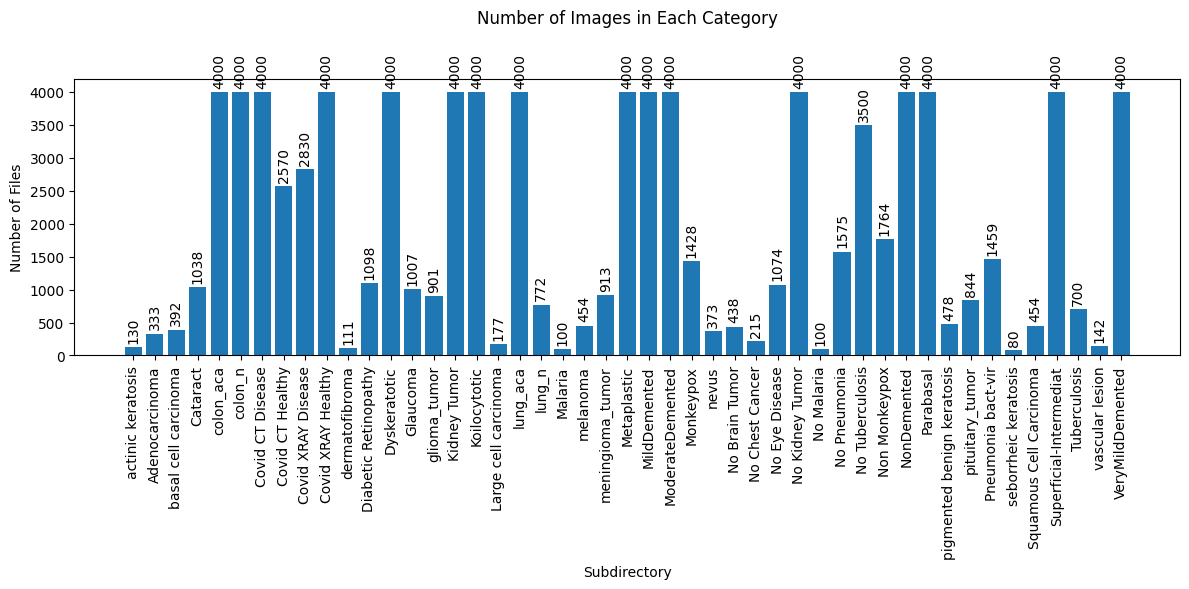

In [26]:
# Showing above details in a diagram
import os
import matplotlib.pyplot as plt

# Define the source directory
source_dir = "Data4000Cat"

# Function to get the number of files in subdirectories excluding the first level
def get_subdirectory_file_counts(base_dir):
    subdirectories = []
    counts = []

    for root, dirs, files in os.walk(base_dir):
        if root == base_dir:
            continue
        if os.path.commonpath([base_dir, root]) == base_dir:  # Exclude first level
            subdirectory = os.path.basename(root)  # Extract the final directory name
            file_count = len(files)
            if file_count > 0:  # Only include subdirectories with files
                subdirectories.append(subdirectory)
                counts.append(file_count)

    return subdirectories, counts

# Display the number of files in each subdirectory and plot the data
subdirectories, counts = get_subdirectory_file_counts(source_dir)

if subdirectories:
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    bars = ax.bar(subdirectories, counts)
    plt.xlabel('Subdirectory')
    plt.ylabel('Number of Files')
    
    # Adjust the title's vertical position to add space
    plt.title('Number of Images in Each Category', pad=40)

    # Rotate the x-axis labels 90 degrees
    plt.xticks(rotation=90)

    # Add counts on top of each bar with rotation
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

    plt.tight_layout()
    plt.show()
else:
    print("No subdirectories with files found.")
 

In [27]:
# Genrating images to make the images in each category between 3000-4000 images
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

# Remove Final_Data if it already exists
destination = 'DataFinal'
if os.path.exists(destination):
    shutil.rmtree(destination)

# Create a new destination directory
os.makedirs(destination)

# Copy all files from TPD4000CAT to Final_Data
source = 'Data4000Cat'
shutil.copytree(source, destination, dirs_exist_ok=True)

# Task 3: Generate images in Final_Data using ImageDataGenerator

# Define the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for subdir in os.listdir(destination):
    subdir_path = os.path.join(destination, subdir)
    current_files_count = len([f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))])

    if current_files_count < 4000:
        images_to_generate = 4000 - current_files_count

        # Loading existing images in the subdirectory
        existing_images = [image.load_img(os.path.join(subdir_path, img), target_size=(90, 120)) for img in os.listdir(subdir_path)]

        # Generate augmented images using ImageDataGenerator
        for i in range(images_to_generate):
            img = np.array(existing_images[i % len(existing_images)])
            img = img.reshape((1,) + img.shape)
            
            for batch in datagen.flow(img, save_to_dir=subdir_path, save_prefix='generated', save_format='png'):
                break 

print('Number of Images in each Category after image generation:\n')
destination = "DataFinal"
total_images_count = 0

for subdir in os.listdir(destination):
    subdir_path = os.path.join(destination, subdir)
    if os.path.isdir(subdir_path):
        images_count = len([f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))])
        print(f"{subdir},----- Images Count: {images_count}")
        total_images_count += images_count

print(f"\nTotal Images: {total_images_count}")

Number of Images in each Category after image generation:

actinic keratosis,----- Images Count: 3324
Adenocarcinoma,----- Images Count: 3388
basal cell carcinoma,----- Images Count: 3390
Cataract,----- Images Count: 3626
colon_aca,----- Images Count: 4000
colon_n,----- Images Count: 4000
Covid CT Disease,----- Images Count: 4000
Covid CT Healthy,----- Images Count: 3895
Covid XRAY Disease,----- Images Count: 3919
Covid XRAY Healthy,----- Images Count: 4000
dermatofibroma,----- Images Count: 3325
Diabetic Retinopathy,----- Images Count: 3631
Dyskeratotic,----- Images Count: 4000
Glaucoma,----- Images Count: 3598
glioma_tumor,----- Images Count: 3552
Kidney Tumor,----- Images Count: 4000
Koilocytotic,----- Images Count: 4000
Large cell carcinoma,----- Images Count: 3333
lung_aca,----- Images Count: 4000
lung_n,----- Images Count: 3560
Malaria,----- Images Count: 3317
melanoma,----- Images Count: 3460
meningioma_tumor,----- Images Count: 3559
Metaplastic,----- Images Count: 4000
MildDeme

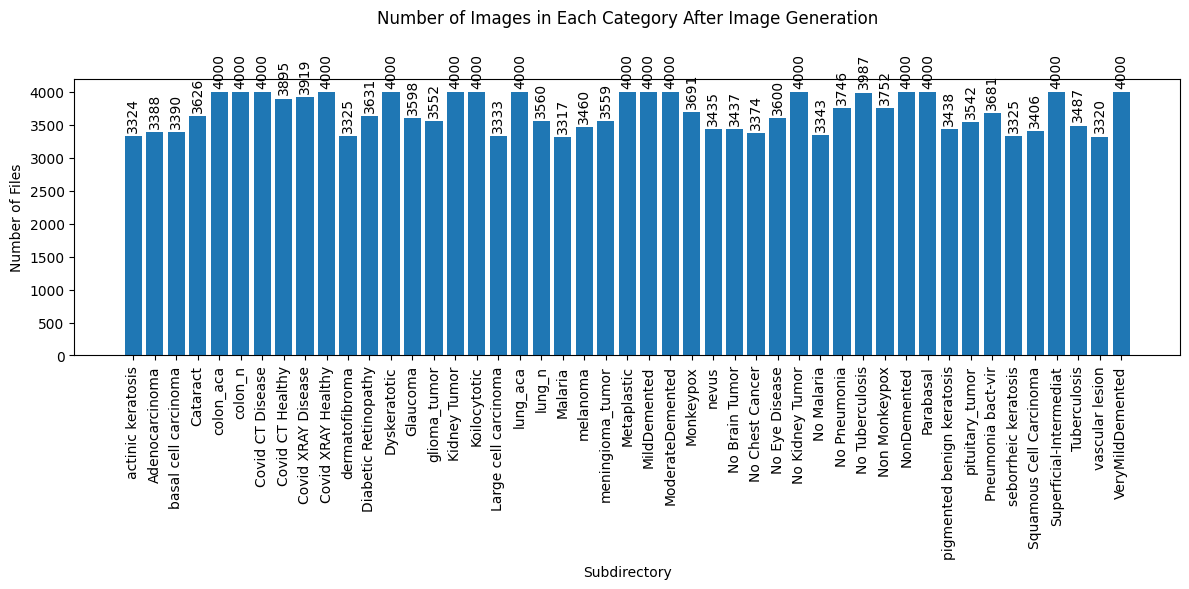

In [28]:
# Showing above details in a diagram
import os
import matplotlib.pyplot as plt

# Define the source directory
source_dir = "DataFinal"

# Function to get the number of files in subdirectories excluding the first level
def get_subdirectory_file_counts(base_dir):
    subdirectories = []
    counts = []

    for root, dirs, files in os.walk(base_dir):
        if root == base_dir:
            continue
        if os.path.commonpath([base_dir, root]) == base_dir:  # Exclude first level
            subdirectory = os.path.basename(root)  # Extract the final directory name
            file_count = len(files)
            if file_count > 0:  # Only include subdirectories with files
                subdirectories.append(subdirectory)
                counts.append(file_count)

    return subdirectories, counts

# Display the number of files in each subdirectory and plot the data
subdirectories, counts = get_subdirectory_file_counts(source_dir)

if subdirectories:
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    bars = ax.bar(subdirectories, counts)
    plt.xlabel('Subdirectory')
    plt.ylabel('Number of Files')
    
    # Adjust the title's vertical position to add space
    plt.title('Number of Images in Each Category After Image Generation', pad=40)

    # Rotate the x-axis labels 90 degrees
    plt.xticks(rotation=90)

    # Add counts on top of each bar with rotation
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

    plt.tight_layout()
    plt.show()
else:
    print("No subdirectories with files found.")
 

In [30]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def preprocess_and_split_data(source_dir, image_size=(120, 90), test_size=0.2, random_state=42):
    # Lists to store file paths and corresponding labels
    file_paths = []
    labels = []
    label_mapping = {}  # Dictionary to map category names to integer labels

    # Iterate through subdirectories in the source directory
    for i, category in enumerate(os.listdir(source_dir)):
        label_mapping[category] = i  # Map category name to a unique integer label
        category_path = os.path.join(source_dir, category)
        if os.path.isdir(category_path):
            # Get a list of all images in the current category
            image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif'))]

            # Append file paths and labels
            file_paths.extend([os.path.join(category_path, image_file) for image_file in image_files])
            labels.extend([i for _ in range(len(image_files))])

    # Convert labels to categorical format
    categorical_labels = to_categorical(labels, num_classes=len(label_mapping))

    # Split data into training and testing sets
    train_paths, test_paths, train_labels, test_labels = train_test_split(
        file_paths, categorical_labels, test_size=test_size, random_state=random_state
    )

    # Load and preprocess training set
    x_train = np.array([preprocess_image(path, image_size) for path in train_paths])
    y_train = np.array(train_labels)

    # Load and preprocess testing set
    x_test = np.array([preprocess_image(path, image_size) for path in test_paths])
    y_test = np.array(test_labels)

    return x_train, x_test, y_train, y_test

def preprocess_image(input_path, image_size):
    # Open the image, resize, convert to grayscale, and return as NumPy array
    img = Image.open(input_path).resize(image_size).convert('L')
    return np.array(img)

# Replace 'source_directory' with your actual directory path
source_directory = "DataFinal"

x_train, x_test, y_train, y_test = preprocess_and_split_data(source_directory)

x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# Print the shapes of the resulting arrays
print("x_train shape:", x_train_reshaped.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test_reshaped.shape)
print("y_test shape:", y_test.shape)
# Reshape the input data to have a single channel


x_train shape: (138752, 90, 120, 1)
y_train shape: (138752, 47)
x_test shape: (34689, 90, 120, 1)
y_test shape: (34689, 47)


In [31]:
#Building Base Model

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the learning rate
learning_rate = 0.0001  # You can adjust this value

# Define the model with more convolutional layers and one additional dense layer
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(x_train.shape[1],  x_train.shape[2], 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    
    layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(1024, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    
    layers.Conv2D(2048, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    
    # Two additional convolutional layers
           
    layers.Flatten(),
    
    layers.Dense(1024, activation='relu'),  # Additional dense layer
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),  # Additional dense layer
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(y_train.shape[1], activation='softmax')
])

# Define the optimizer with a learning rate
optimizer = optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the specified optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_reshaped, y_train, epochs=25, batch_size=16, validation_data=(x_test_reshaped, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/25
8672/8672 [==============================] - 386s 43ms/step - loss: 1.9241 - accuracy: 0.3115 - val_loss: 1.1903 - val_accuracy: 0.5221
Epoch 2/25
8672/8672 [==============================] - 379s 44ms/step - loss: 1.0605 - accuracy: 0.5792 - val_loss: 0.8189 - val_accuracy: 0.6815
Epoch 3/25
8672/8672 [==============================] - 378s 44ms/step - loss: 0.8088 - accuracy: 0.6876 - val_loss: 0.6428 - val_accuracy: 0.7566
Epoch 4/25
8672/8672 [==============================] - 376s 43ms/step - loss: 0.6585 - accuracy: 0.7495 - val_loss: 0.5640 - val_accuracy: 0.7807
Epoch 5/25
8672/8672 [==============================] - 376s 43ms/step - loss: 0.5529 - accuracy: 0.7912 - val_loss: 0.5253 - val_accuracy: 0.8023
Epoch 6/25
8672/8672 [==============================] - 376s 43ms/step - loss: 0.4697 - accuracy: 0.8238 - val_loss: 0.4364 - val_accuracy: 0.8382
Epoch 7/25
8672/8672 [==============================] - 376s 43ms/step - loss: 0.4098 - accuracy: 0.8486 - val_loss: 0

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 90, 120, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 120, 32)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 120, 64)       18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 30, 256)       2

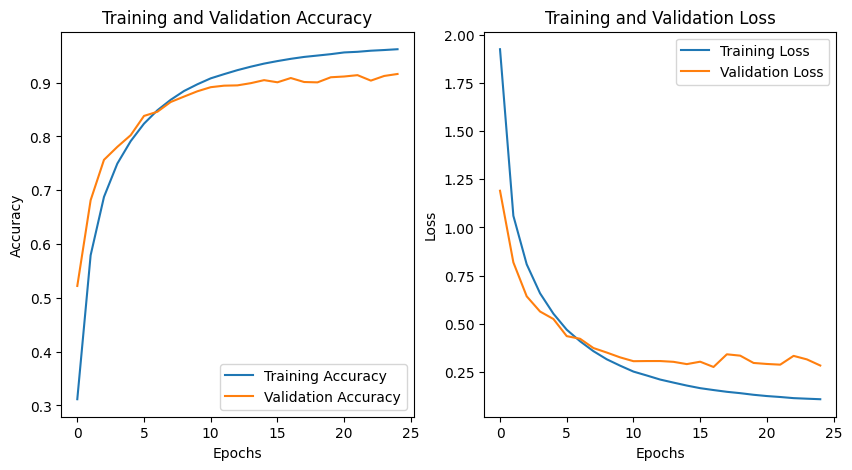

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [34]:
# Saving the model
model.save('ModelF')
print('Model saved')

INFO:tensorflow:Assets written to: ModelF\assets
Model saved


In [35]:
import keras
from keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

size=7000
# Loading the MNIST dataset
(x1_train, y1_train), (x1_test, y1_test) = mnist.load_data()

# Combine the training and testing data
x_data = np.concatenate((x1_train, x1_test), axis=0)
y_data = np.concatenate((y1_train, y1_test), axis=0)

# Use train_test_split to randomly select 1000 samples
x_sampled, _, y_sampled, _ = train_test_split(x_data, y_data, train_size=size, random_state=42)

# Resize and normalize the data
x_sampled_resized = []
for img in x_sampled:
    # Resize each image to (120, 90) using PIL
    img_resized = Image.fromarray(img).resize((120, 90))
    x_sampled_resized.append(np.array(img_resized))

# Convert the list to a NumPy array
#x_sampled_resized = np.array(x_sampled_resized).reshape((1000, 120, 90, 1)).astype('float32') / 255
x_sampled_resized = np.array(x_sampled_resized).reshape((size, 90,120, 1))
# Convert labels to categorical format if needed
y_sampled = to_categorical(y_sampled)

# Split the sampled data into training and testing sets with an 80-20 ratio
x_train, x_test, y_train, y_test = train_test_split(x_sampled_resized, y_sampled, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays to verify the split
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (5600, 90, 120, 1)
y_train shape: (5600, 10)
x_test shape: (1400, 90, 120, 1)
y_test shape: (1400, 10)


In [41]:

#Building Model on the basis of pretrained model: Transfer Learning

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image


pretrained_model = load_model('FModel')

flatten_index = None
for i, layer in enumerate(pretrained_model.layers):
    if isinstance(layer, Flatten):
        flatten_index = i
        break

# Create a new model up to the Flatten layer
model_up_to_flatten = Sequential(pretrained_model.layers[:flatten_index + 1])

# Freeze the weights of the layers in the pre-trained model up to Flatten
for layer in model_up_to_flatten.layers:
    layer.trainable = False

# Add new layers for the target task (MNIST digit classification)
model = Sequential()
model.add(model_up_to_flatten)
model.add(Dense(512, activation='relu'))  # Additional dense layer
model.add(Dense(256, activation='relu'))  # Additional dense layer
model.add(Dense(128, activation='relu'))  # Additional dense layer
model.add(Dense(64, activation='relu'))  # Additional dense layer
model.add(Dense(32, activation='relu'))  # Additional dense layer

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize variables to track the highest validation accuracy and the corresponding epoch
history = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_data=(x_test, y_test))
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nFinal Test accuracy:", test_acc)


Epoch 1/100
700/700 [==============================] - 9s 12ms/step - loss: 1.5503 - accuracy: 0.4400 - val_loss: 1.0205 - val_accuracy: 0.6529
Epoch 2/100
700/700 [==============================] - 8s 12ms/step - loss: 1.1466 - accuracy: 0.6009 - val_loss: 0.7570 - val_accuracy: 0.7757
Epoch 3/100
700/700 [==============================] - 8s 12ms/step - loss: 0.9961 - accuracy: 0.6582 - val_loss: 0.6495 - val_accuracy: 0.8157
Epoch 4/100
700/700 [==============================] - 8s 12ms/step - loss: 0.9183 - accuracy: 0.6911 - val_loss: 0.5838 - val_accuracy: 0.8293
Epoch 5/100
700/700 [==============================] - 8s 12ms/step - loss: 0.8542 - accuracy: 0.7121 - val_loss: 0.5588 - val_accuracy: 0.8114
Epoch 6/100
700/700 [==============================] - 8s 12ms/step - loss: 0.8380 - accuracy: 0.7239 - val_loss: 0.5409 - val_accuracy: 0.8514
Epoch 7/100
700/700 [==============================] - 8s 12ms/step - loss: 0.7944 - accuracy: 0.7471 - val_loss: 0.5062 - val_accuracy:

In [44]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 2048)              25164032  
_________________________________________________________________
dense_30 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 10)              

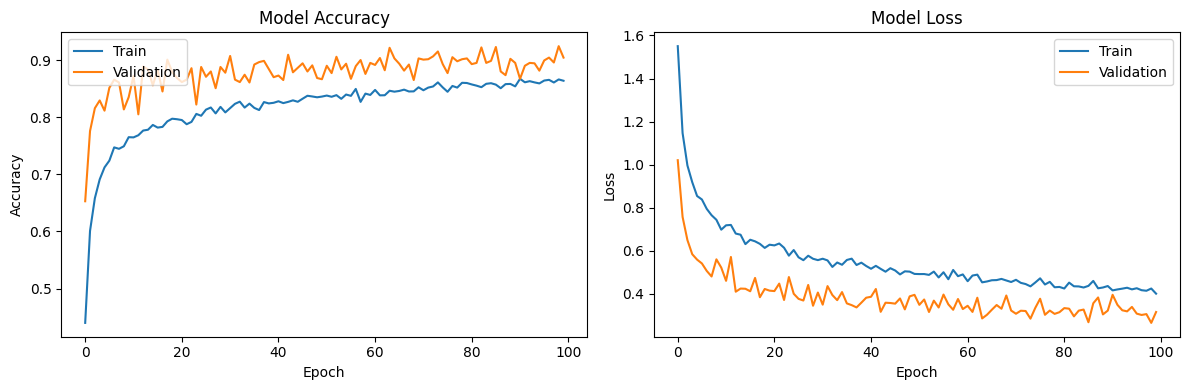

In [42]:
# Drawing graphs between traing and validation data for accurancy as well as loss
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()
